In [129]:
student_ID = 305261083

#1.
#My question is: Does USA aids poor countries more than wealthy countries?
#I found a nice databast on the US gov site:
#https://foreignassistance.gov/data
#The complete foreign aid budget dataset: President's Budget Request, initial allocations, and final allocations

#2.a.
#our important data includes: Country Name = nominal variable. 
#Income group ID = income of country, from 1-4, Ordinal variable.
#US Category Name = purpose for aid US gave, nominal variable
#Fiscal Year = interval variable.
#current_amount = budget used in $, ratio variable. ALSO OUR TARGET VARIABLE

#2.c.
#an anomaly is Israel which is a wealthy country rated 4 in Income ID
#but at the same breath it is the country that gets most aid
#solution was to calculate the aid without Israel

In [ ]:
#3.b.
#I've added another feature - post afghanistan war. to see if afghanistan is still getting alot of aid

In [3]:
import pandas as pd

In [4]:
foreign = pd.read_csv("us_foreign_budget_complete.csv",usecols = ["Income Group ID","Country Name","US Category Name","Fiscal Year","current_amount"])
foreign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53059 entries, 0 to 53058
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      53059 non-null  object 
 1   Income Group ID   40527 non-null  float64
 2   US Category Name  53059 non-null  object 
 3   Fiscal Year       53059 non-null  int64  
 4   current_amount    53059 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ MB


In [5]:
foreign.head(5)
#these are the 5 first rows, describing aids US gave to foreign countries
#in this case all five are for Afghanistan

,Country Name,Income Group ID,US Category Name,Fiscal Year,current_amount
0,Afghanistan,1.0,Education and Social Services,2022,33000000
1,Afghanistan,1.0,Education and Social Services,2022,17000000
2,Afghanistan,1.0,Health,2022,2000000
3,Afghanistan,1.0,Health,2022,8000000
4,Afghanistan,1.0,Health,2022,16700000


In [6]:
foreign.nunique().head()
#I want to see how many countries are there, getting aid from US
#And how many years of data are there

Country Name          188
Income Group ID         4
US Category Name        9
Fiscal Year            19
current_amount      10716
dtype: int64

In [7]:
foreign.sort_values("Income Group ID", ascending=False).head(5)
#I want to see some wealthy countries that gets aid from US

,Country Name,Income Group ID,US Category Name,Fiscal Year,current_amount
20836,Lithuania,4.0,Peace and Security,2014,2549000
28935,Poland,4.0,Peace and Security,2017,3000000
14555,Hungary,4.0,Peace and Security,2015,993000
14554,Hungary,4.0,Peace and Security,2014,1152000
14553,Hungary,4.0,Peace and Security,2013,1044000


In [8]:
#This is just to see samples of aids for different countries
countries = foreign.groupby("Country Name").first()
countries

,Income Group ID,US Category Name,Fiscal Year,current_amount
Country Name,,,,
Afghanistan,1.0,Education and Social Services,2022,33000000
Albania,3.0,"Democracy, Human Rights, and Governance",2022,2250000
Algeria,3.0,Peace and Security,2022,1300000
Angola,2.0,Health,2022,19000000
Argentina,4.0,Peace and Security,2022,650000
...,...,...,...,...
Western Hemisphere Region,NaN,Education and Social Services,2022,10000000
World,NaN,Multi-sector,2004,985628849
Yemen,1.0,Education and Social Services,2022,7000000


In [9]:
#I want to see how much aid did Argentina got in 19 years.

total = foreign.loc[foreign['Country Name'] == 'Argentina', 'current_amount'].sum()
print(total)

39048000


In [27]:
#Creating a class for countries:
class Country:
    def __init__(self, data, country):
        self.df = data
        self.country = country

    #a function to see how much aid the country get in total.
    def aid_in_total(self):
        total = self.df.loc[self.df['Country Name'] == self.country, 'current_amount'].sum()
        return total
    
    #a function to see how wealthy the country is from 1 to 4
    def get_wealth(self):
        return self.df.loc[self.df['Country Name'] == self.country, 'Income Group ID'].head(1)
         
    
Egypt = Country(foreign, 'Egypt')
print(Egypt.aid_in_total())
print(Egypt.get_wealth())

45462186031
37318    2.0
Name: Income Group ID, dtype: float64


In [41]:
#now Lets see which country gets most aid from USA:
dct1 = {}

#I'm using a dictionary and not a dataframe for the convenience.
for index, row in foreign.iterrows():
    if row['Country Name'] not in dct1.keys() and row['Country Name']!='World':
        #there is also aid for World, which i had to leave out my calculations because i want to watch countries only
        dct1[row['Country Name']]=foreign.loc[foreign['Country Name'] == row['Country Name'], 'current_amount'].sum()

In [44]:
#now i'm sorting my dictionary to see which country gets most aid
sorted_dict = {k: v for k, v in sorted(dct1.items(), reverse=True, key=lambda item: item[1])}

for index, element in zip(range(20), sorted_dict):
    print(element+": "+str(sorted_dict[element]))

Israel: 89278860000
Afghanistan: 87880321256
Egypt: 45462186031
Pakistan: 31100431380
Jordan: 28373725337
Iraq: 21589505801
Kenya: 18160258334
Nigeria: 16749723233
Ethiopia: 16061626752
Tanzania: 14612150094
South Africa: 13720214108
Uganda: 13381131805
Colombia: 12554734996
Zambia: 11183558000
Mozambique: 11175283000
West Bank and Gaza: 10318788338
Haiti: 9624111000
Sudan: 7920202000
Congo (Kinshasa): 7616409023
Ukraine: 7257445498


In [46]:
#since afghanistan is at 2nd place after Israel
#I'm going to create another feature:
#if year is > 2020 than we are post afghan war (not super accurate).
#let add the feature:
foreign["post_afg_war"] = foreign['Fiscal Year']>2020
foreign2 = foreign[foreign["post_afg_war"]]
foreign2

,Country Name,Income Group ID,US Category Name,Fiscal Year,current_amount,post_afg_war
0,Afghanistan,1.0,Education and Social Services,2022,33000000,True
1,Afghanistan,1.0,Education and Social Services,2022,17000000,True
2,Afghanistan,1.0,Health,2022,2000000,True
3,Afghanistan,1.0,Health,2022,8000000,True
4,Afghanistan,1.0,Health,2022,16700000,True
...,...,...,...,...,...,...
52853,Kosovo,2.0,Peace and Security,2021,1000000,True
52880,Kosovo,2.0,Peace and Security,2021,750000,True
52947,Kosovo,2.0,Peace and Security,2021,900000,True
53001,Kosovo,2.0,Economic Development,2021,500000,True


In [48]:
#lets see if afghanistan is at 2nd place since war ended

dct6 = {}
for index, row in foreign2.iterrows():
    if row['Country Name'] not in dct6.keys() and row['Country Name']!='World':
        dct6[row['Country Name']]=foreign2.loc[(foreign2['Country Name'] == row['Country Name']), 'current_amount'].sum()
        
#sorting the dictionary:
sorted_dict2 = {k: v for k, v in sorted(dct6.items(), reverse=True, key=lambda item: item[1])}

for index, element in zip(range(20), sorted_dict2):
    print(element+": "+str(sorted_dict2[element]))

Israel: 6600000000
Egypt: 2812150000
Jordan: 2550000000
Middle East and North Africa Region: 1299100000
Sub-Saharan Africa Region: 1225195000
Nigeria: 1068000000
Mozambique: 994550000
Tanzania: 900350000
Colombia: 866750000
Uganda: 845357000
Kenya: 835650000
Zambia: 792291000
Ukraine: 775800000
Afghanistan: 735600000
South Africa: 675300000
Ethiopia: 582320000
Iraq: 573000000
Congo (Kinshasa): 572200000
Western Hemisphere Region: 568938000
Central America Region: 496850000


In [ ]:
#Afghanistan aid went down significantly since war ended!

In [50]:
#Now to answer the main question, does US helps poor countries more than rich countries:

dct3 = {}
for index, row in foreign.iterrows():
    if row['Income Group ID'] not in dct3.keys() and row['Income Group ID'] >0.1:
        dct3[row['Income Group ID']]=foreign.loc[foreign['Income Group ID'] == row['Income Group ID'], 'current_amount'].sum()
dct3

{1.0: 216849006928, 3.0: 112817641421, 2.0: 205902362888, 4.0: 92061265385}

In [ ]:
#seems like it is. 

In [53]:
#let's sort the dictionary and make sure poor countries-numbered "1", are getting more aid than richer countries

{k: v for k, v in sorted(dct3.items(), reverse=True, key=lambda item: item[1])}

{1.0: 216849006928, 2.0: 205902362888, 3.0: 112817641421, 4.0: 92061265385}

<BarContainer object of 4 artists>

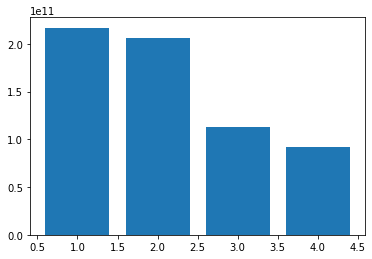

In [59]:
#lets see it in graph:
import matplotlib.pylab as plt

names, counts = zip(*dct3.items())
plt.bar(names, counts)

In [61]:
#Because Israel is an exception of a wealthy country who gets alot of aid
#Let's create another dictionary, and decrease Israel aid afterwards to see the numbers:

dct4 = dct3

#now I am going to reduce Israel and see the major change: 

dct4[4.0]-=foreign.loc[foreign['Country Name'] == 'Israel', 'current_amount'].sum()

#sorting the dictionary:

{k: v for k, v in sorted(dct4.items(), reverse=True, key=lambda item: item[1])}

{1.0: 216849006928, 2.0: 205902362888, 3.0: 112817641421, 4.0: 2782405385}

<BarContainer object of 4 artists>

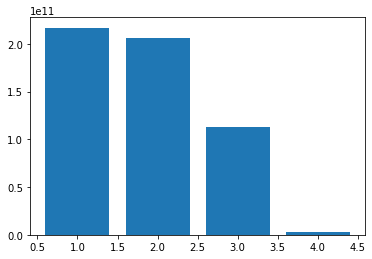

In [63]:
#most aid USA gave to wealthy countries went to Israel!
#now lets see the new graph, to see how much aid wealthy countries got after we took out Israel:

names, counts = zip(*dct4.items())
plt.bar(names, counts)

In [ ]:
#Ok, not most aid for wealthy countries went to Israel, but ALMOST ALL AID. 

In [ ]:
#so it seems US does help poor countries more than wealthy countries, nice to see that.
#it's also nice to see how much US is helping out Israel.
#Thank you for the interesting course Danny and Gilad.